In [1]:
# takes 30s
# perform charting experiments on trained par_score model.
# trying to answer question - How well can we predict Par_Score given minimal information?
#   i.e. information already known (Vul) or information gleaned from bidding
# This info helps to predict how close an AI model can get to human performance.

# previous steps
# acbl-hand-records-train-experiments.ipynbcreates: 
#   1) acbl-hand-records-augmented.pkl
#   2) LatestModel.pkl
#   3) dep_var named files e.g. Par_Score_20Iters_20.pkl

In [2]:
import pandas as pd
import pathlib
import pickle
import re
from collections import defaultdict
from IPython.display import display # needed to define display() method in vscode
import mlBridgeLib

In [3]:
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')

In [6]:
# load 'LatestModel.pkl'
latest_model_file = savedModelsPath.joinpath('LatestModel.pkl')
df_preds = pd.read_pickle(latest_model_file)
print(f"Latest model file size:{latest_model_file.stat().st_size}")
#dep_var, trainx, trainy, validx, validy, m, predictionsEmbedded, probabilities, predictionsCoefficientsdf, max_iter, hidden_layer_sizes = saved_model.values()
df_preds.head()

Latest model file size:796855062


,EC2,EC3,EC4,EC5,EC6,EC7,EC8,EC9,ECA,ECJ,ECK,ECQ,ECT,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,EDA,EDJ,EDK,EDQ,EDT,EH2,EH3,EH4,EH5,EH6,EH7,EH8,EH9,EHA,EHJ,EHK,EHQ,EHT,ES2,ES3,ES4,ES5,ES6,ES7,ES8,ES9,ESA,ESJ,ESK,ESQ,EST,HCP_EW,HCP_E_C,HCP_E_D,HCP_E_H,HCP_E_S,HCP_NS,HCP_N_C,HCP_N_D,...,SSA,SSJ,SSK,SSQ,SST,Valid,Vul_EW,Vul_NS,WC2,WC3,WC4,WC5,WC6,WC7,WC8,WC9,WCA,WCJ,WCK,WCQ,WCT,WD2,WD3,WD4,WD5,WD6,WD7,WD8,WD9,WDA,WDJ,WDK,WDQ,WDT,WH2,WH3,WH4,WH5,WH6,WH7,WH8,WH9,WHA,WHJ,WHK,WHQ,WHT,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WSA,WSJ,WSK,WSQ,WST
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,19,3,5,2,4,21,5,1,...,0,0,1,0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,18,4,0,0,5,22,4,1,...,0,0,1,0,0,False,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,17,0,0,0,3,23,3,6,...,1,0,0,0,0,False,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,28,9,7,4,1,12,1,1,...,1,0,0,0,0,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,27,2,4,3,2,13,7,0,...,0,0,0,0,0,False,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0


In [7]:
#print(f'model: max_iter:{max_iter} hidden_layer_sizes:{hidden_layer_sizes} score:{m.score(validx,validy)}')

In [8]:
valid = df_preds[df_preds['Valid']]

In [9]:
valid[['Par_Score_var']].value_counts() #,'Par_Score_pred','Par_Score_var']].value_counts()

Par_Score_var
14.35            74
17.96            72
22.49            72
14.90            72
-25.55           72
-3.09            71
23.35            71
28.08            71
0.11             71
16.29            71
9.90             71
9.10             71
2.96             71
29.80            71
26.34            71
16.78            71
-15.22           71
17.25            71
27.47            71
28.06            71
7.23             71
13.45            71
9.40             71
27.80            71
12.34            71
                 ..
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.26              1
9.27              1
9.27              1
9.27  

In [10]:
# describe actual vs predicted variance
valid['Par_Score_var'].abs().describe()

count   119639.00
mean        16.06
std         11.54
min          0.00
25%          8.03
50%         14.82
75%         22.19
max        508.46
Name: Par_Score_var, dtype: float64

In [11]:
# value_counts where actual < predicted
valid['Par_Score_var'][valid['Par_Score_var'].lt(0)].value_counts()

-25.55    72
-15.22    71
-3.09     71
-35.94    69
-31.67    69
-10.03    69
-21.93    69
-5.41     68
-2.18     68
-26.55    68
-9.13     68
-3.55     68
-0.22     68
-1.30     68
-7.96     68
-6.00     68
-10.23    67
-0.13     67
-7.17     66
-10.80    66
-5.90     65
-11.51    65
-6.18     61
-4.43     61
-2.00     60
          ..
-26.00     1
-26.26     1
-35.20     1
-5.60      1
-3.62      1
-3.14      1
-8.92      1
-42.52     1
-42.44     1
-59.74     1
-3.86      1
-9.79      1
-1.08      1
-4.09      1
-6.63      1
-16.41     1
-3.43      1
-5.93      1
-2.99      1
-23.95     1
-7.70      1
-7.44      1
-2.57      1
-11.87     1
-16.16     1
Name: Par_Score_var, Length: 9765, dtype: int64

In [12]:
# value_counts where actual > predicted
valid['Par_Score_var'][valid['Par_Score_var'].gt(0)].value_counts()

14.35    74
14.90    72
22.49    72
17.96    72
23.35    71
0.11     71
12.34    71
7.23     71
9.90     71
26.34    71
16.29    71
27.80    71
27.47    71
29.90    71
2.96     71
17.25    71
29.80    71
28.06    71
16.78    71
28.08    71
9.10     71
13.45    71
9.40     71
26.95    70
7.04     70
         ..
17.50     1
17.48     1
27.97     1
0.84      1
16.11     1
22.55     1
11.38     1
4.53      1
16.95     1
12.17     1
21.40     1
21.13     1
21.13     1
10.03     1
12.77     1
22.18     1
19.70     1
25.04     1
13.84     1
9.51      1
17.44     1
27.45     1
3.06      1
22.32     1
15.23     1
Name: Par_Score_var, Length: 54201, dtype: int64

<AxesSubplot:>

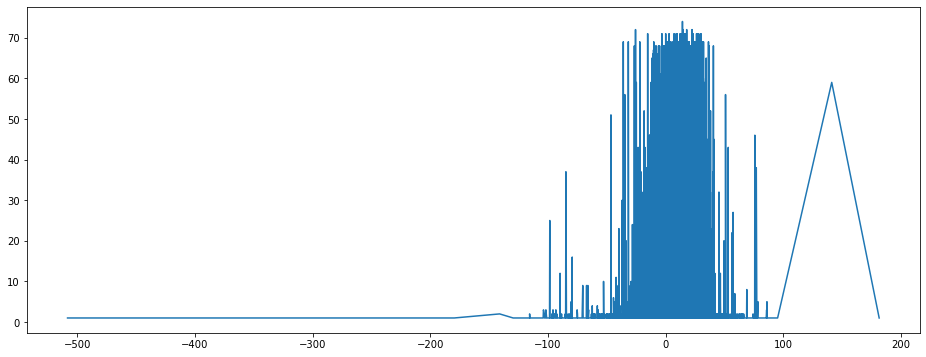

In [13]:
valid['Par_Score_var'].value_counts().sort_index().plot(figsize=(16,6))

In [14]:
# show actual vs predicted greatest variances
valid['Par_Score_var'].abs().nlargest(10).index

Int64Index([996310, 1015963, 420757, 2520144, 5084, 183953, 263868, 272760,
            291676, 326809],
           dtype='int64')

<AxesSubplot:title={'center':'Par Score Actual vs Pred Variance'}, xlabel='Variance', ylabel='Percent'>

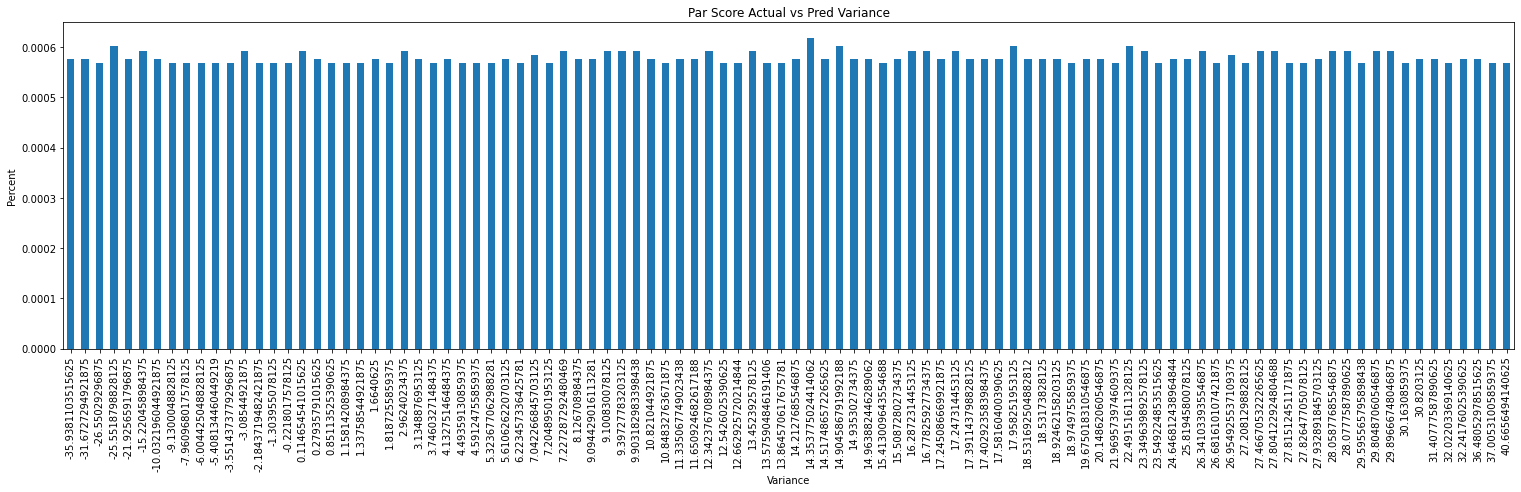

In [15]:
# takes 2s
diffs = valid['Par_Score_var'].value_counts(normalize=True).nlargest(100).sort_index()
diffs.plot(kind='bar',figsize=(26,6),xlabel='Variance',ylabel='Percent',title='Par Score Actual vs Pred Variance')

In [16]:
valid.value_counts().describe()

count   64831.00
mean        1.85
std         5.32
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        72.00
dtype: float64

In [17]:
# takes 40s
# obsolete? Doesn't work with fastai trained models.
#fig, ax = plt.subplots(figsize=(26,26))
#sklearn.metrics.plot_confusion_matrix(None, valid['Par_Score'], valid['Par_Score_pred'], ax=ax, cmap=plt.cm.Blues)
#ax.set(xlabel='Actual Par_Score', ylabel='Predicted Par_Score', title='Confusion Matrix of Par_Score - Actual vs Predicted')

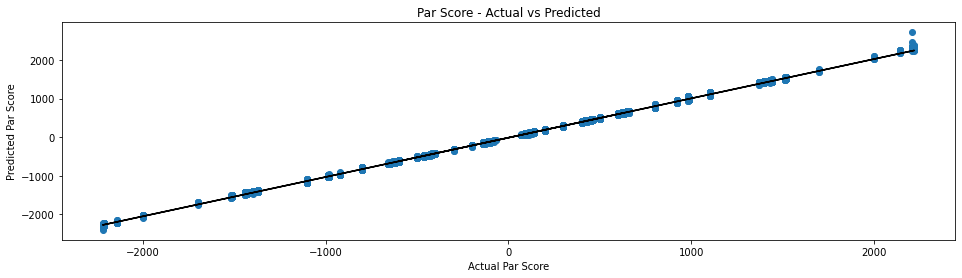

In [18]:
fig, ax = plt.subplots(figsize=(16,4))
xvalues = valid['Par_Score']
yvalues = valid['Par_Score_pred']
ax.set(xlabel='Actual Par Score', ylabel='Predicted Par Score', title='Par Score - Actual vs Predicted')
ax.scatter(xvalues, yvalues)
z = np.polyfit(xvalues, yvalues, 1)
p = np.poly1d(z)
ax.plot(xvalues, p(xvalues),'k-')